In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

# Define the seed
SEED = 26  # You can use any random seed value here

# Load the data
features = pd.read_excel('高温合金数据集合2.xlsx')
label1 = np.array(features['Creep life'])
features = features.drop(['UTS', 'TYS', 'EL'], axis=1)
label1 = np.log(label1)  # Take the logarithm
features = pd.get_dummies(features)
feature_list = list(features.columns)
features = np.array(features)
features = MinMaxScaler().fit_transform(features)

# Ridge Regression
# Define the Ridge Regression model
model_ridge = Ridge()

# Define the number of folds
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=SEED)

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Solver for weight optimization
}

# Create the GridSearchCV object
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=num_folds, scoring='neg_mean_squared_error')

# Initialize variables to store performance metrics
rmse_tr_ridge_list = []
rmse_te_ridge_list = []
r2_tr_ridge_list = []
r2_te_ridge_list = []

# Perform 10-fold cross-validation with GridSearchCV
for train_index, test_index in kf.split(features):
    train_features, test_features = features[train_index], features[test_index]
    train_labels, test_labels = label1[train_index], label1[test_index]

    # Perform GridSearchCV for Ridge Regression
    grid_search_ridge.fit(train_features, train_labels)

    # Get the best Ridge Regression model
    best_model_ridge = grid_search_ridge.best_estimator_

    # Predictions
    train_predicted_creeplife = best_model_ridge.predict(train_features)
    test_predicted_creeplife = best_model_ridge.predict(test_features)

    # Calculate performance metrics
    rmse_tr_ridge = mean_squared_error(train_labels, train_predicted_creeplife, squared=False)
    rmse_te_ridge = mean_squared_error(test_labels, test_predicted_creeplife, squared=False)
    r2_tr_ridge = r2_score(train_labels, train_predicted_creeplife)
    r2_te_ridge = r2_score(test_labels, test_predicted_creeplife)

    # Append the metrics to the lists
    rmse_tr_ridge_list.append(rmse_tr_ridge)
    rmse_te_ridge_list.append(rmse_te_ridge)
    r2_tr_ridge_list.append(r2_tr_ridge)
    r2_te_ridge_list.append(r2_te_ridge)

# Calculate the mean and standard deviation of the metrics
mean_rmse_tr_ridge = np.mean(rmse_tr_ridge_list)
mean_rmse_te_ridge = np.mean(rmse_te_ridge_list)
mean_r2_tr_ridge = np.mean(r2_tr_ridge_list)
mean_r2_te_ridge = np.mean(r2_te_ridge_list)

# Print the results for Ridge Regression with tuned hyperparameters
print("Ridge Regression Results with Tuned Hyperparameters:")
print("Mean RMSE (Train): {:.4f}".format(mean_rmse_tr_ridge))
print("Mean RMSE (Test): {:.4f}".format(mean_rmse_te_ridge))
print("Mean R^2 (Train): {:.4f}".format(mean_r2_tr_ridge))
print("Mean R^2 (Test): {:.4f}".format(mean_r2_te_ridge))

# Print the best hyperparameters for Ridge Regression
print("\nBest Hyperparameters for Ridge Regression:")
print(grid_search_ridge.best_params_)

Ridge Regression Results with Tuned Hyperparameters:
Mean RMSE (Train): 0.6320
Mean RMSE (Test): 0.6559
Mean R^2 (Train): 0.6868
Mean R^2 (Test): 0.6251

Best Hyperparameters for Ridge Regression:
{'alpha': 1.0, 'solver': 'lsqr'}


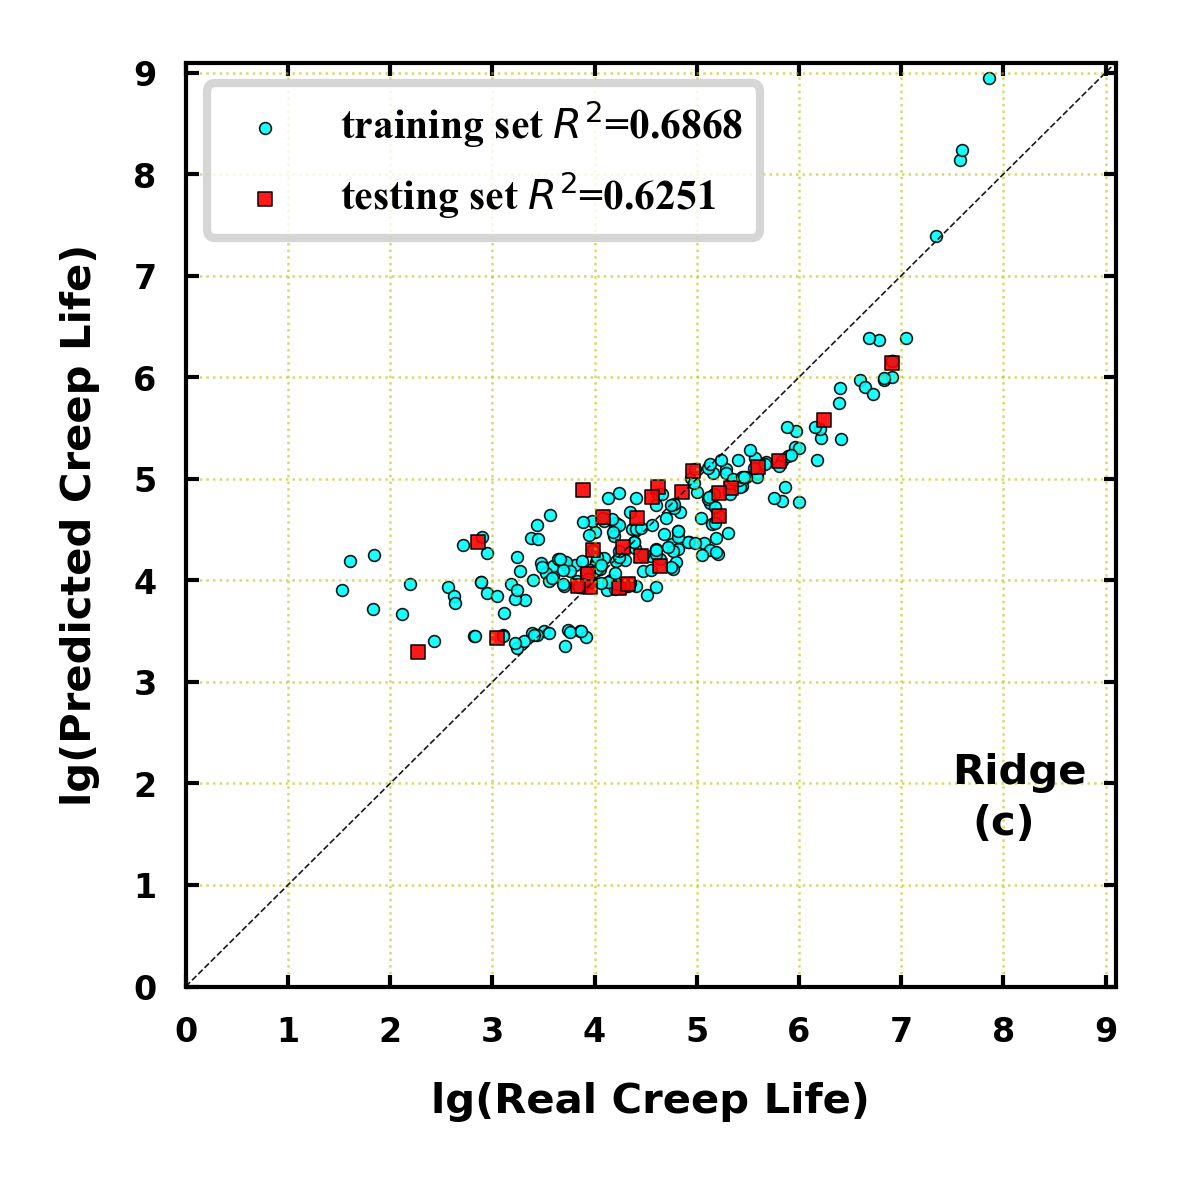

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the mean_r2_tr_rf, mean_r2_te_rf, train_labels, train_predicted_creeplife,
# test_labels, and test_predicted_creeplife variables

mean_r2_tr_ridge = np.mean(r2_tr_ridge_list)
mean_r2_te_ridge = np.mean(r2_te_ridge_list)

# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(0, 15, 1))
plt.xticks(new_ticks, fontsize=4,fontweight='bold')
plt.yticks(new_ticks, fontsize=4,fontweight='bold')
plt.plot([0, 9.1], [0, 9.1], 'k--', linewidth='0.2', alpha=0.9)

# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels, train_predicted_creeplife, alpha=0.9, s=2, linewidths=0.2, c='#00ffFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % mean_r2_tr_ridge, marker='o')
plt.scatter(test_labels, test_predicted_creeplife, alpha=0.9, s=3, linewidths=0.2, c='#FF0000',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % mean_r2_te_ridge, marker='s')

plt.ylim(0, 9.1)
plt.xlim(0, 9.1)

# 添加图例
plt.legend(prop={'family': 'Times New Roman', 'size': 5, 'weight': 'bold'}, ncol=1)

# 显示性能指标
# Display the plot
plt.xlabel('lg(Real Creep Life)', size=5, weight='bold')
plt.ylabel('lg(Predicted Creep Life)', size=5, weight='bold')
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(7.5, 2.0, 'Ridge', fontsize=5, weight='bold')
plt.text(7.7, 1.5, '(c)', fontsize=5, weight='bold')

plt.show()